## Importing Required Libraries


In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time

In [128]:
from bs4 import BeautifulSoup
import requests
import re, nltk
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer

In [129]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas.util.testing as tm

## Web scraping

### Targetting and crwaling India Today Website to crawl and extract Viral and Non-Viral News

In [130]:
#Viral news URLs
urltrend=['https://www.indiatoday.in/trending-news?page=1','https://www.indiatoday.in/trending-news?page=2','https://www.indiatoday.in/trending-news?page=3','https://www.indiatoday.in/trending-news?page=4','https://www.indiatoday.in/trending-news?page=5','https://www.indiatoday.in/trending-news?page=7','https://www.indiatoday.in/trending-news?page=6','https://www.indiatoday.in/trending-news?page=10','https://www.indiatoday.in/trending-news?page=2']

#Non-viral news URLs
url=["https://www.indiatoday.in/india",'https://www.indiatoday.in/india?page=12','https://www.indiatoday.in/india?page=11','https://www.indiatoday.in/india?page=10','https://www.indiatoday.in/india?page=9','https://www.indiatoday.in/india?page=8','https://www.indiatoday.in/india?page=6','https://www.indiatoday.in/india?page=5','https://www.indiatoday.in/india?page=4','https://www.indiatoday.in/india?page=12','https://www.indiatoday.in/india?page=7']

#Test URL (both trending and normal news for testing)
urltest=['https://www.indiatoday.in/trending-news?page=15','https://www.indiatoday.in/india?page=13']


#### We Pass the URL and then using HTML parser beautiful soup extract required news headings

#### Perhaps Headers can be used 

In [131]:
def get_text(url):
    title=[]
    description=[]
    
    for i in url:    
        r1 =requests.get(i)

        # Soup creation
        soup = BeautifulSoup(r1.content, 'html.parser')

        # News identification
        for foo in soup.find_all('div',attrs={'class':'detail'}):
            bar = foo.find('h2', attrs={'class':''})
            try :
                para = foo.find('p').getText()
            except :
                pass
            try:
                title.append(bar["title"])
                description.append(para)
            except:
                pass
            
           
            #time.sleep(1)
           
    #Creating dataframe for news title and description   
    #print(description)
    df=[]
    df=pd.DataFrame(df)
    df["Title"]=title
    df["Description"]=description
    
    return df

### Creating 3 Datasets Separate

In [132]:
normal=get_text(url)
trending=get_text(urltrend)
test=get_text(urltest)

In [133]:
trending

,Title,Description
0,Coronavirus patients sing and dance at quarant...,A video of a group of novel coronavirus patien...
1,5-feet-long rat snake rescued from Delhi's R K...,A rat snake was rescued from the R K Khanna St...
2,75-year-old Warrior Aaji Maa from Pune juggles...,The elderly woman from Pune displays her skill...
3,Gli the cat can stay even as Istanbul's Hagia ...,With the decision to turn the museum into a mo...
4,Buffalo chases elephant away. Viral video has ...,A video of an elephant and a buffalo is doing ...
...,...,...
103,Reporter interviews donkey to urge locals to w...,A video of a reporter interviewing a donkey in...
104,US man fakes death to avoid jail. Gets caught ...,A US-based man faked his death to avoid jail. ...
105,Rat saves her babies from drowning during heav...,A video of a rat saving her babies from drowni...
106,Kanye West hints at delaying presidential run ...,"In his recent tweet, rapper Kanye West has hin..."


## Creating Target column

In [134]:
#Creating virality column (0 for non-viral news, 1 for viral news)
normal["virality"]=0
trending['virality']=1

In [135]:
normal.head(10)

,Title,Description,virality
0,E-Mindrocks: How to take care of your mind? Me...,"Dr Samir Parekh, a passionate professional who...",0
1,Madhya Pradesh CM Shivraj Singh Chouhan tests ...,Madhya Pradesh Chief Minister Shivraj Sinh Cho...,0
2,Assam reduces home quarantine period to 7 days...,According to the government order issued by th...,0
3,UP businessman's 8-year-old grandson rescued a...,All the five accused in the Gonda kidnapping c...,0
4,"E-Mindrocks LIVE Updates: Sonakshi Sinha, Ratn...",All the five accused in the Gonda kidnapping c...,0
5,"Coronavirus: India reports nearly 49,000 cases...","India has reported 48,916 new coronavirus case...",0
6,Rajasthan crisis: Congress workers to protest ...,The Rajasthan Congress has decided to protest ...,0
7,Assam floods ground report: NDRF carries out r...,India Today brings you this ground report from...,0
8,"With new strategy, tougher grip on his flock, ...",From displaying jitters over numbers till a f...,0
9,Rajasthan Cabinet meet: Gehlot firm on his dem...,The meeting was held at the chief minister's r...,0


### Combining normal and viral news for creating training set

In [136]:
train=pd.concat([trending,normal],axis=0)

In [137]:
#Dropping duplicate values(in case of any)
train.drop_duplicates(subset='Description',keep='first',inplace=True)

In [138]:
train["virality"].value_counts()

0    115
1     96
Name: virality, dtype: int64

### Random Shuffling

In [139]:
#Shuffling training and test set
train = train.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)

## Final Dataset Looks like this

In [140]:
train.head()

,Title,Description,virality
0,"Social distancing, police in PPE, sanitisation...","With the coronavirus crisis far from over, the...",0
1,Coronavirus patients sing and dance at quarant...,A video of a group of novel coronavirus patien...,1
2,New trade routes and more: India’s bid to woo ...,Apart from opening and identifying more border...,0
3,Gurugram: Private hospital booked after corona...,A private hospital in Gurugram's Sector 37 has...,0
4,Viral video shows peacock eating rice from man...,A video of a peacock eating rice from a man's ...,1


## Performing Cleaning Operations

### Stop words: Most common words like "The", "A" etc

In [141]:
#Cleaning text data through removing punctuation,stopwords & using lemmatization. 

stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
def data_cleaning(news):
    proc=[]
    for line in news:
        only_letters = re.sub("[^a-zA-Z0-9]", " ",line) 
        tokens = nltk.word_tokenize(only_letters)
        lower_case = [l.lower() for l in tokens]
        filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
        lemmas = ' '.join([wordnet_lemmatizer.lemmatize(t) for t in filtered_result])
        proc.append(lemmas)
    return proc        

train["Description"] = data_cleaning(train["Description"])
test["Description"] = data_cleaning(test["Description"])



[nltk_data] Downloading package wordnet to /home/bhavesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [142]:
y=train["virality"]

## Document-Term Matrix

In [144]:
a=train.shape[0]

In [145]:
#combining train and test to create document term matrix
combined=pd.concat([train,test],axis=0)

In [146]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
def dtm(textcol):
    
    cv = CountVectorizer(stop_words='english')
    data_cv = cv.fit_transform(textcol)
    data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
    data_dtm.index = textcol.index
    return data_dtm

In [147]:
dtmcombined=dtm(combined["Description"])

In [149]:
dtmcombined

,000,10,100,11,110,12,120,13,14,15,...,worth,written,xii,year,yellow,yogi,youtube,zone,zoo,zoological
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
#Splitting combineddtm back into train and test document-term matrices
dtmtrain=dtmcombined.iloc[:a,:]
dtmtest=dtmcombined.iloc[a:,:]

## Data-visualization

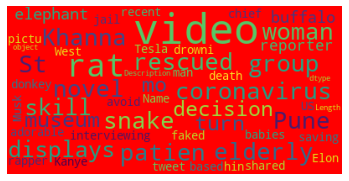

In [154]:
#Word cloud

wordcloud = WordCloud(    background_color='Red',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                          ).generate(str(trending["Description"]))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

[Text(0, 0, 'video'),
 Text(0, 0, 'viral'),
 Text(0, 0, 'gone'),
 Text(0, 0, 'coronavirus'),
 Text(0, 0, 'india'),
 Text(0, 0, 'internet'),
 Text(0, 0, 'social'),
 Text(0, 0, 'medium'),
 Text(0, 0, 'case'),
 Text(0, 0, 'police'),
 Text(0, 0, 'rajasthan'),
 Text(0, 0, 'man'),
 Text(0, 0, 'twitter'),
 Text(0, 0, 'two'),
 Text(0, 0, 'state'),
 Text(0, 0, 'woman'),
 Text(0, 0, 'covid'),
 Text(0, 0, 'minister'),
 Text(0, 0, 'said'),
 Text(0, 0, 'year')]

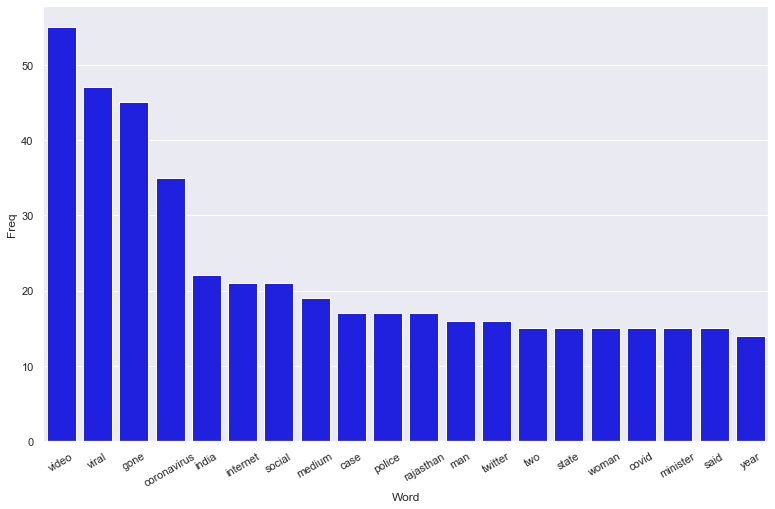

In [156]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(train['Description'], n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df,color='Blue')
g.set_xticklabels(g.get_xticklabels(), rotation=30)

[Text(0, 0, 'gone viral'),
 Text(0, 0, 'social medium'),
 Text(0, 0, 'viral internet'),
 Text(0, 0, 'novel coronavirus'),
 Text(0, 0, 'viral social'),
 Text(0, 0, 'ashok gehlot'),
 Text(0, 0, 'video gone'),
 Text(0, 0, 'face mask'),
 Text(0, 0, 'year old'),
 Text(0, 0, 'chief minister'),
 Text(0, 0, 'governor kalraj'),
 Text(0, 0, 'kalraj mishra'),
 Text(0, 0, 'covid 19'),
 Text(0, 0, 'india today'),
 Text(0, 0, 'viral twitter'),
 Text(0, 0, 'uttar pradesh'),
 Text(0, 0, 'coronavirus pandemic'),
 Text(0, 0, 'congress mlas'),
 Text(0, 0, 'sachin pilot'),
 Text(0, 0, 'coronavirus patient')]

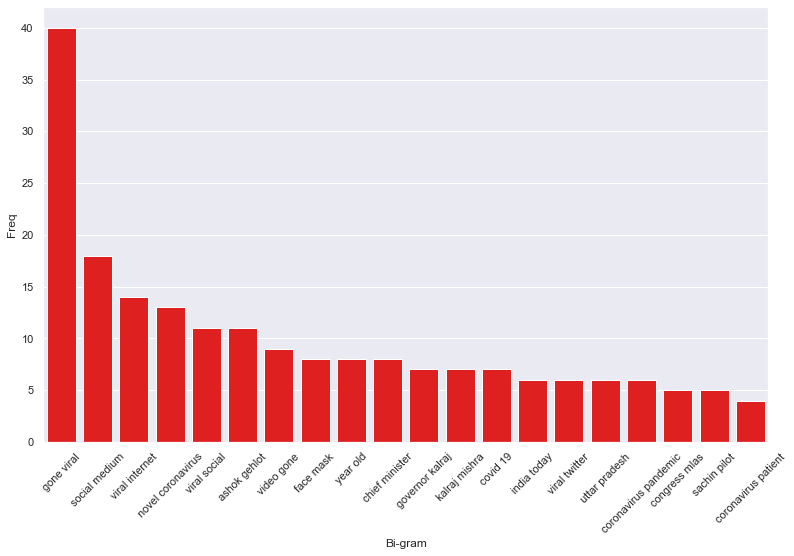

In [157]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(train["Description"] ,n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]

#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df,color="red")
h.set_xticklabels(h.get_xticklabels(), rotation=45)

## Splitting train and test

In [158]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dtmtrain,y, test_size=0.2,random_state=0)

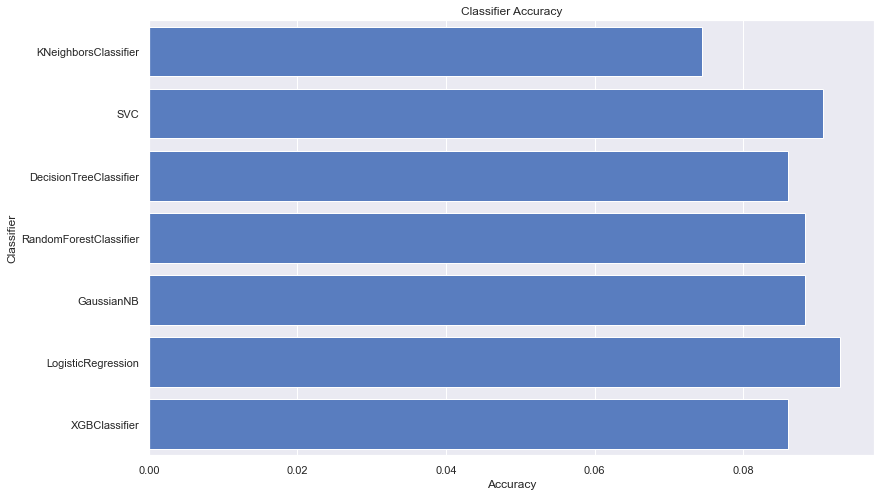

In [159]:
#Classifier comparison
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression(),XGBClassifier()]


log_cols = ["Classifier", "Accuracy"]
log  = pd.DataFrame(columns=log_cols)


acc_dict = {}

     
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [112]:
# from xgboost import XGBClassifier
# classifier=XGBClassifier()
# classifier.fit(X_train,y_train)

In [160]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [161]:
y_pred=classifier.predict(X_test)

In [162]:
#Confusin matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[23,  1],
       [ 2, 17]])

In [163]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9302325581395349

## Predicting test news cases

In [164]:
y_p=classifier.predict(dtmtest)

In [165]:
test["virality"]=y_p

In [166]:
test.drop("Description",axis=1,inplace=True)

In [168]:
test.head(10)

,Title,virality
0,"Lund University, one of the top 100 in the wor...",0
1,Shiv Sena criticises MP Udayanraje Bhonsle ove...,0
2,The Eternal Couple: Stunning pics of black pan...,1
3,Karnataka ventilator scam real or fake?,0
4,AIMIM MP questions PM Modi's Aug 5 Ayodhya vis...,0
5,Covid to China: Has 're-invented' Rahul Gandhi...,0
6,Uttar Pradesh: 120 inmates at Jhansi prison te...,0
7,Coronavirus: Jharkhand announces up to 2-year ...,0
8,"Waiters wearing PPE kits, socially-distanced d...",1
9,Mannequin in saree offers sanitiser to custome...,1
